<a href="https://colab.research.google.com/github/veronica1908/FINANZAS_E4_AIII/blob/main/c_modelosipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paquetes y librerías

In [ ]:
# PAQUETES
%pip install xgboost
!pip install import_ipynb
!pip install openpyxl
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 31.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# LIBRERÍAS

import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import import_ipynb
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

import a_funciones as funciones

import joblib  ### para guardar modelos
import openpyxl

# Base de datos

In [ ]:
#Importamos la base de datos
df_final2 = pd.read_csv('https://media.githubusercontent.com/media/veronica1908/FINANZAS_E4_AIII/main/base_final.txt', sep='\t', header=0, encoding='latin1')
df_final2

,Mes_Pago,Asegurado_Id,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado,Poliza_Asegurado_Id,FECHA_INICIO,FECHA_CANCELACION,...,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,CancelaciÃ³n,Edad,Grupo_Edad,Mes pago,AÃ±o pago,Duracion_Cobertura,Costo_Reclamacion
0,2018-03-01,4834968,EXAMENES DE DIAGNOSTICO,Z011,EXAMEN DE OÃÂDOS Y DE LA AUDICIÃÂN,1,495341.335642,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,3,2018,729,495341.335642
1,2018-04-01,4834968,LABORATORIO CLINICO,9,DIAGNÃÂSTICO PENDIENTE,15,717708.276982,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,4,2018,729,47847.218465
2,2018-03-01,4834968,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,427837.347642,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,3,2018,729,427837.347642
3,2018-05-01,4834968,EXAMENES DE DIAGNOSTICO,9,DIAGNÃÂSTICO PENDIENTE,1,496955.561442,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,5,2018,729,496955.561442
4,2018-11-01,4834968,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,2,523223.417642,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,11,2018,729,261611.708821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778164,2019-08-01,25333920,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,430625.555842,189568131,2019-04-01,2019-12-31,...,0,0,0,0,31,30-39,8,2019,274,430625.555842
3778165,2018-02-01,17044022,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,423728.409242,94128351,2018-01-01,2018-01-05,...,0,0,0,1,38,30-39,2,2018,4,423728.409242
3778166,2018-11-01,52163564,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,485068.989642,101267369,2018-01-01,2019-12-31,...,0,0,0,1,13,10-19,11,2018,729,485068.989642
3778167,2019-12-01,48242859,CONSULTA DE URGENCIAS,9,DIAGNÃÂSTICO PENDIENTE,1,529464.601576,175057169,2018-10-18,2019-12-31,...,0,0,0,0,17,10-19,12,2019,439,529464.601576


In [ ]:
#Observar si existen nulos
df_final2.isnull().sum()

Mes_Pago                0
Asegurado_Id            0
Reclamacion             0
Diagnostico_Codigo      0
Diagnostico_Desc        0
Eventos                 0
Valor_Pagado            0
Poliza_Asegurado_Id     0
FECHA_INICIO            0
FECHA_CANCELACION       0
FECHA_FIN               0
Mujer                   0
FechaNacimiento         0
Ciudad                  0
CANCER                  0
EPOC                    0
DIABETES                0
HIPERTENSION            0
ENF_CARDIOVASCULAR      0
CancelaciÃ³n            0
Edad                    0
Grupo_Edad             82
Mes pago                0
AÃ±o pago               0
Duracion_Cobertura      0
Costo_Reclamacion       0
dtype: int64

In [ ]:
#Como son pocos los nulos que estan en la variable "Grupo_Edad", procedemos a eliminarlos

df_final2 = df_final2.dropna(subset=['Grupo_Edad'])

# Opcionalmente, puedes resetear el índice del DataFrame si es necesario
df_final2.reset_index(drop=True, inplace=True)

In [ ]:
#Verificamos la existencia de nulos
df_final2.isnull().sum()

Mes_Pago               0
Asegurado_Id           0
Reclamacion            0
Diagnostico_Codigo     0
Diagnostico_Desc       0
Eventos                0
Valor_Pagado           0
Poliza_Asegurado_Id    0
FECHA_INICIO           0
FECHA_CANCELACION      0
FECHA_FIN              0
Mujer                  0
FechaNacimiento        0
Ciudad                 0
CANCER                 0
EPOC                   0
DIABETES               0
HIPERTENSION           0
ENF_CARDIOVASCULAR     0
CancelaciÃ³n           0
Edad                   0
Grupo_Edad             0
Mes pago               0
AÃ±o pago              0
Duracion_Cobertura     0
Costo_Reclamacion      0
dtype: int64

In [ ]:
#Para reducir la dimensionalidad, vamos a trabajar solamente con los datos del año más reciente, que correspon de al 2019 (año en el que se realizó el pago)
#y representa el 52% de los registros.
#Eliminamos entonces los datos de 2018
df_final2 = df_final2[df_final2['AÃ±o pago'] != 2018]

In [ ]:
#También vamos a reclasificar la edad por grupos etareos de acuerdo con el ministerio de salud en Colombia
# Definir los intervalos y las etiquetas de las categorías
bins = [0, 5, 11, 18, 26, 59, float('inf')]
labels = ['Primera Infancia (0-5 años)', 'Infancia (6-11 años)', 'Adolescencia (12-18 años)',
          'Juventud (14-26 años)', 'Adultez (27-59 años)', 'Persona Mayor (60 años o más)']

# Asignar las categorías a la columna 'edad'
df_final2['Grupo etareo'] = pd.cut(df_final2['Edad'], bins=bins, labels=labels, right=True)

# Mostrar el DataFrame resultante
print(df_final2)

           Mes_Pago  Asegurado_Id                         Reclamacion  \
7        2019-05-01       4834968                    CONSULTA EXTERNA   
8        2019-01-01       4834968                    CONSULTA EXTERNA   
13       2019-03-01       4834968             EXAMENES DE DIAGNOSTICO   
17       2019-05-01       4834968  CIRUGIA AMBULATORIA POR ENFERMEDAD   
18       2019-07-01       4834968                    CONSULTA EXTERNA   
...             ...           ...                                 ...   
3778074  2019-07-01      11903386               CONSULTA DE URGENCIAS   
3778081  2019-07-01      11470806               CONSULTA DE URGENCIAS   
3778082  2019-08-01      25333920                    CONSULTA EXTERNA   
3778085  2019-12-01      48242859               CONSULTA DE URGENCIAS   
3778086  2019-12-01      30824331               CONSULTA DE URGENCIAS   

        Diagnostico_Codigo                                   Diagnostico_Desc  \
7                        9                

In [ ]:
#Y vamos a trabajar solamente con los grupos etareos de Adultéz y Persona mayor
# Eliminar las filas que corresponden a las categorías que no se utilizarán
df_final2 = df_final2[~df_final2['Grupo etareo'].isin(['Primera Infancia (0-5 años)',
                                                         'Infancia (6-11 años)',
                                                         'Adolescencia (12-18 años)',
                                                         'Juventud (14-26 años)'])]

In [ ]:
#Como la variable RECLAMACIÓN tiene 41 valores diferentes, vamos a revisarlos para realizar una reclasificación y disminuir las categorías.
categorias_reclamacion = df_final2['Reclamacion'].unique()

# Imprimir las categorías únicas
print("Categorías en la columna 'Reclamación':")
for categoria in categorias_reclamacion:
    print(f'    {categoria}')

Categorías en la columna 'Reclamación':
    CONSULTA EXTERNA
    EXAMENES DE DIAGNOSTICO
    CIRUGIA AMBULATORIA POR ENFERMEDAD
    LABORATORIO CLINICO
    TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES
    CONSULTAS PRENATALES
    ATENCION DEL PARTO
    CONSULTA DE URGENCIAS
    TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD
    TRATAMIENTOS ESPECIFICOS
    FISIOTERAPIA ILIMITADA
    TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD
    PAMD
    INFILTRACIONES
    Sin Informacion
    TRASLADO EN AMBULANCIA
    TRATAMIENTO AMBULATORIO POR CANCER
    CONCILIACION
    CIRUGIA AMBULATORIA POR ACCIDENTE
    TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD EN URGENCIAS
    TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER Y COMPLICACIONES
    COBERTURA PROGRAMA PALIATIVOS
    TRATAMIENTOS AMBULATORIOS ESPECIALES
    TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE
    ODONTOLOGÃÂA
    DIALISIS
    ATENCION INTEGRAL DE SALUD MENTAL
    TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACIONES DEL EMBA

In [ ]:
# Con ayuda de inteligencia artificial, buscamos la agrupación de estas reclamaciones en tres categorías

# Diccionario de mapeo
mapping = {
    # Atención Ambulatoria y Consultas
    'CONSULTA EXTERNA': 'Atención Ambulatoria y Consultas',
    'EXAMENES DE DIAGNOSTICO': 'Atención Ambulatoria y Consultas',
    'CIRUGIA AMBULATORIA POR ENFERMEDAD': 'Atención Ambulatoria y Consultas',
    'LABORATORIO CLINICO': 'Atención Ambulatoria y Consultas',
    'TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES': 'Atención Ambulatoria y Consultas',
    'CONSULTAS PRENATALES': 'Atención Ambulatoria y Consultas',
    'CONSULTA DE URGENCIAS': 'Atención Ambulatoria y Consultas',
    'TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD EN URGENCIAS': 'Atención Ambulatoria y Consultas',
    'TRATAMIENTO AMBULATORIO POR CANCER': 'Atención Ambulatoria y Consultas',
    'TRATAMIENTOS ESPECIFICOS': 'Atención Ambulatoria y Consultas',
    'TRASLADO EN AMBULANCIA': 'Atención Ambulatoria y Consultas',
    'TRATAMIENTOS AMBULATORIOS ESPECIALES': 'Atención Ambulatoria y Consultas',
    'ODONTOLOGÍA': 'Atención Ambulatoria y Consultas',
    'FISIOTERAPIA ILIMITADA': 'Atención Ambulatoria y Consultas',
    'DIALISIS': 'Atención Ambulatoria y Consultas',
    'VACUNACION': 'Atención Ambulatoria y Consultas',
    'INFILTRACIONES': 'Atención Ambulatoria y Consultas',
    'PAMD': 'Atención Ambulatoria y Consultas',
    'CONCILIACION': 'Atención Ambulatoria y Consultas',

    # Tratamientos y Cirugías Hospitalarios
    'TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO MEDICO HOSPITALARIO POR CANCER Y COMPLICACIONES': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO MEDICO HOSPITALARIO SIQUIATRICO': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACIONES DEL EMBARAZO': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD CONGENITA': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO HOSPITALARIO POR TRASPLANTES': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO HOSPITALARIO POR ESTADO COMATOSO': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER Y COMPLICACIONES': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD CONGENITA': 'Tratamientos y Cirugías Hospitalarios',
    'CIRUGIA AMBULATORIA POR ACCIDENTE': 'Tratamientos y Cirugías Hospitalarios',
    'CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA': 'Tratamientos y Cirugías Hospitalarios',

    # Otros Servicios
    'ATENCION DEL PARTO': 'Otros Servicios',
    'COBERTURA PROGRAMA PALIATIVOS': 'Otros Servicios',
    'ATENCION INTEGRAL DE SALUD MENTAL': 'Otros Servicios',
    'FUNERARIOS': 'Otros Servicios',
    'ANEXO EXEQUIAL': 'Otros Servicios',
    'EXONERACION DE PAGO DE PRIMAS': 'Otros Servicios',
    'DONACION DE ORGANOS': 'Otros Servicios',
    'Sin Informacion': 'Otros Servicios'
}

# Crear una nueva columna en el DataFrame con las categorías agrupadas
df_final2['Cat_reclamacion'] = df_final2['Reclamacion'].map(mapping)

# Mostrar el DataFrame resultante
print(df_final2)

           Mes_Pago  Asegurado_Id                         Reclamacion  \
7        2019-05-01       4834968                    CONSULTA EXTERNA   
8        2019-01-01       4834968                    CONSULTA EXTERNA   
13       2019-03-01       4834968             EXAMENES DE DIAGNOSTICO   
17       2019-05-01       4834968  CIRUGIA AMBULATORIA POR ENFERMEDAD   
18       2019-07-01       4834968                    CONSULTA EXTERNA   
...             ...           ...                                 ...   
3778068  2019-02-01      14911468                    CONSULTA EXTERNA   
3778074  2019-07-01      11903386               CONSULTA DE URGENCIAS   
3778081  2019-07-01      11470806               CONSULTA DE URGENCIAS   
3778082  2019-08-01      25333920                    CONSULTA EXTERNA   
3778086  2019-12-01      30824331               CONSULTA DE URGENCIAS   

        Diagnostico_Codigo                                   Diagnostico_Desc  \
7                        9                

In [ ]:
# Borramos las variables que no necesitamos y no aportan al modelo
# Se borra Diagnostico_Desc porque se va a dejar la columna del codigo del CIE10 y es lo mismo

columnas_a_borrar = ['Mes_Pago','Asegurado_Id','Diagnostico_Codigo','Diagnostico_Desc','Eventos','Poliza_Asegurado_Id','FECHA_INICIO','FECHA_CANCELACION','FECHA_FIN',
                     'FechaNacimiento','Edad','Mes pago', 'AÃ±o pago','Costo_Reclamacion','Duracion_Cobertura', 'Reclamacion', 'Grupo_Edad']

df_final2 = df_final2.drop(columns=columnas_a_borrar)
df_final2.head()

,Valor_Pagado,Mujer,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,CancelaciÃ³n,Grupo etareo,Cat_reclamacion
7,430625.555842,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
8,427837.347642,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
13,496955.561442,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
17,730871.554642,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
18,513244.567242,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas


In [ ]:
# Renombramos la columna 'CancelaciÃ³n' a 'Cancelacion'
df_final2.rename(columns={'CancelaciÃ³n': 'Cancelacion'}, inplace=True)
df_final2.head()

,Valor_Pagado,Mujer,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Cancelacion,Grupo etareo,Cat_reclamacion
7,430625.555842,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
8,427837.347642,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
13,496955.561442,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
17,730871.554642,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
18,513244.567242,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas


In [ ]:
# Verificamos cuántos Únicos tiene cada variable para relacionarnos con el modelo
unicos_por_columna = df_final2.nunique()

# Imprimir el número de valores únicos por columna
print(unicos_por_columna)

Valor_Pagado          288521
Mujer                      2
Ciudad                     6
CANCER                     2
EPOC                       2
DIABETES                   2
HIPERTENSION               2
ENF_CARDIOVASCULAR         2
Cancelacion                2
Grupo etareo               2
Cat_reclamacion            3
dtype: int64


#Convertir a dummies

In [ ]:
df_dummies = df_final2.copy()

In [ ]:
# Identificamos las columnas categoricas
cat_df_final = df_dummies.select_dtypes(include=['object']).columns

# Crear un listado para almacenar el detalle de las categorías únicas de cada columna
detalle_categorias = []

# Iterar a través de las columnas categóricas y almacenar el detalle de las categorías únicas en el listado
for column in cat_df_final:
    unique_categories = df_dummies[column].unique()
    detalle_categorias.append((column, unique_categories))

# Mostrar el detalle de las categorías únicas
for column, categories in detalle_categorias:
    print(f'Categorías en "{column}":')
    for category in categories:
        print(f'    {category}')

Categorías en "Ciudad":
    Cali
    Cartagena
    Bogota
    Barranquilla
    Medellin
    Sin InformaciÃ³n
Categorías en "Cat_reclamacion":
    Atención Ambulatoria y Consultas
    Otros Servicios
    Tratamientos y Cirugías Hospitalarios
    nan


In [ ]:
list_dummies = cat_df_final.difference(['Diagnostico_Codigo'])
list_dummies

Index(['Cat_reclamacion', 'Ciudad'], dtype='object')

In [ ]:
# Creamos un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat_df_final:
    if len(df_dummies[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies[column] = le.fit_transform(df_dummies[column])

# Variables con mas de 2 categorias
df_dummies_final = pd.get_dummies(df_dummies)

In [ ]:
df_dummies_final.head(10)

,Valor_Pagado,Mujer,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Cancelacion,Ciudad_Barranquilla,Ciudad_Bogota,...,Ciudad_Sin InformaciÃ³n,Grupo etareo_Primera Infancia (0-5 años),Grupo etareo_Infancia (6-11 años),Grupo etareo_Adolescencia (12-18 años),Grupo etareo_Juventud (14-26 años),Grupo etareo_Adultez (27-59 años),Grupo etareo_Persona Mayor (60 años o más),Cat_reclamacion_Atención Ambulatoria y Consultas,Cat_reclamacion_Otros Servicios,Cat_reclamacion_Tratamientos y Cirugías Hospitalarios
7,430625.555842,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
8,427837.347642,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
13,496955.561442,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
17,730871.554642,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
18,513244.567242,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
19,438256.441442,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
20,570157.766516,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
23,497326.833376,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
25,422994.670242,1,0,0,0,0,0,0,False,False,...,False,False,False,False,False,True,False,True,False,False
26,473329.165642,1,0,0,0,0,0,0,False,False,...,False,False,False,False,False,True,False,True,False,False


#Escalado y/o estandarización de los datos

In [ ]:
# Muestrea una porción de los datos
df_sample = df_dummies_final.sample(frac=0.1)  # Usando el 10% de los datos
y= df_sample['Valor_Pagado']
X1_sample = df_sample.loc[:, ~df_sample.columns.isin(['Valor_Pagado'])]

scaler = StandardScaler()
scaler.fit(X1_sample)
X2_sample = scaler.transform(X1_sample)
X= pd.DataFrame(X2_sample, columns=X1_sample.columns)

In [ ]:
# Como se tiene una base de datos demasiado grande se habra un proceso combinando de Reducción de Dimensionalidad y
# Muestreo para seleccionar el conjunto de datos que se la va a aplicar al modelo
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

# Muestrea una porción de los datos
#df_sample = df_dummies_final.sample(frac=0.1)  # Usando el 10% de los datos
#y= df_sample['Valor_Pagado']
#X1_sample = df_sample.loc[:, ~df_sample.columns.isin(['Valor_Pagado'])]

# Escalar los datos
#scaler = StandardScaler()
#X2_sample = scaler.fit_transform(X1_sample)

# Aplicar PCA para reducir la dimensionalidad
#pca = PCA(n_components=0.95)  # Mantén el 95% de la varianza
#X_reduced_sample = pca.fit_transform(X2_sample)

# Convertir de nuevo a DataFrame
#X= pd.DataFrame(X_reduced_sample)

## Árbol de decisión

|--- Cat_reclamacion_Tratamientos y Cirugías Hospitalarios <= 3.61
|   |--- Cat_reclamacion_Otros Servicios <= 6.28
|   |   |--- EPOC <= 1.93
|   |   |   |--- value: [684151.40]
|   |   |--- EPOC >  1.93
|   |   |   |--- value: [1384750.38]
|   |--- Cat_reclamacion_Otros Servicios >  6.28
|   |   |--- Mujer <= -0.34
|   |   |   |--- value: [724384.21]
|   |   |--- Mujer >  -0.34
|   |   |   |--- value: [3145439.49]
|--- Cat_reclamacion_Tratamientos y Cirugías Hospitalarios >  3.61
|   |--- Grupo etareo_Persona Mayor (60 años o más) <= 0.73
|   |   |--- CANCER <= 4.36
|   |   |   |--- value: [5721987.30]
|   |   |--- CANCER >  4.36
|   |   |   |--- value: [33807414.05]
|   |--- Grupo etareo_Persona Mayor (60 años o más) >  0.73
|   |   |--- Ciudad_Cartagena <= 0.95
|   |   |   |--- value: [11096676.28]
|   |   |--- Ciudad_Cartagena >  0.95
|   |   |   |--- value: [6273762.64]



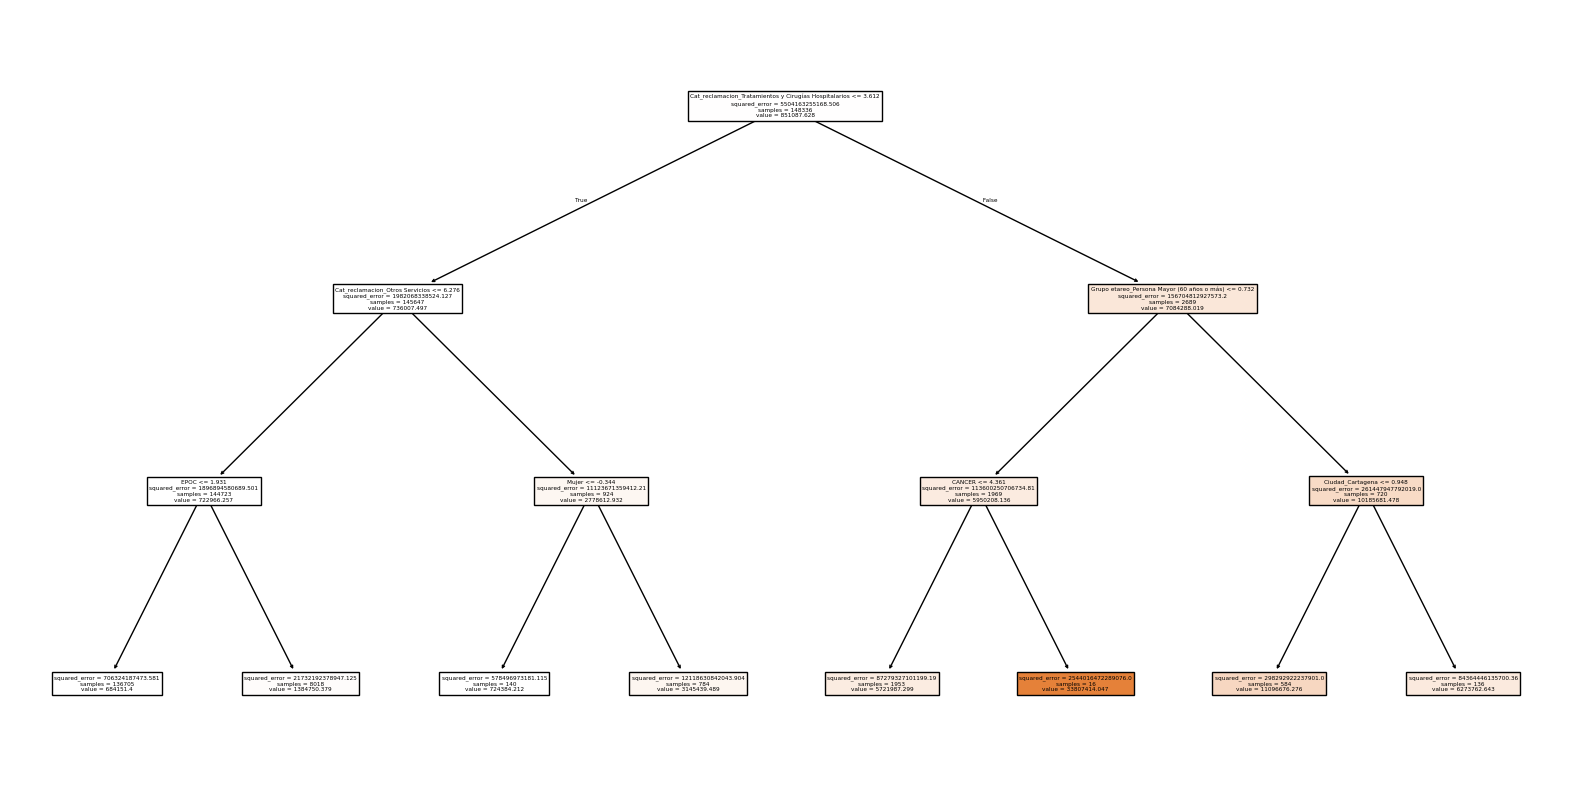

In [ ]:
# Crear y entrenar el modelo de árbol de decisión para regresión
rtree = DecisionTreeRegressor(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

# Modelos candidatos

In [ ]:
# Define los modelos de regresión seleccionados
#m_linreg = LinearRegression()
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [ m_tree_reg, m_rf_reg, m_gbt_reg]

## Selección de variables

In [ ]:
# Ahora, utiliza estos modelos para seleccionar las variables
var_names = funciones.sel_variables(modelos_reg, X, y, threshold="2*mean")
X2=X[var_names] ### matriz con variables seleccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148336 entries, 0 to 148335
Data columns (total 1 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Cat_reclamacion_Tratamientos y Cirugías Hospitalarios  148336 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148336 entries, 0 to 148335
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Mujer                                                  148336 non-null  float64
 1   CANCER                                                 148336 non-null  float64
 2   EPOC                                                   148336 non-null  float64
 3   DIABETES                                              

## Definir modelo ganador

In [ ]:
# Calculamos también el R2, para verificar el comportamiento de los modelos

def medir_modelos_r2(modelos, X, y, cv=5):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='r2')
        resultados[nombre_modelo] = scores.mean()
    return resultados

# Define los modelos de regresión seleccionados
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [m_tree_reg, m_rf_reg, m_gbt_reg]

# Calcular R2 para todos los modelos con todas las variables
r2_scores_all = medir_modelos_r2(modelos_reg, X, y, cv=5)

# Calcular R2 para todos los modelos con variables seleccionadas
r2_scores_varsel = medir_modelos_r2(modelos_reg, X2, y, cv=5)

print("R2 para todos los modelos con todas las variables:")
for modelo, r2_score in r2_scores_all.items():
    print(f"{modelo}: {r2_score}")

print("\nR2 para todos los modelos con variables seleccionadas:")
for modelo, r2_score in r2_scores_varsel.items():
    print(f"{modelo}: {r2_score}")


R2 para todos los modelos con todas las variables:
DecisionTreeRegressor: 0.049248651981333214
RandomForestRegressor: 0.10470405170642239
GradientBoostingRegressor: 0.18016521137160868

R2 para todos los modelos con variables seleccionadas:
DecisionTreeRegressor: 0.1355670818083229
RandomForestRegressor: 0.1356269707734306
GradientBoostingRegressor: 0.13556718152764607


In [ ]:
# Se prueba el modelo usando el MSE
def medir_modelos(modelos, X, y, cv):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='neg_mean_squared_error')
        mse_scores = -scores  # Convertir puntuaciones negativas a positivas
        resultados[nombre_modelo] = mse_scores.mean()
    return resultados

# Calcular MSE para todos los modelos con todas las variables
mse_scores_all = medir_modelos(modelos_reg, X, y, 30)

# Calcular MSE para todos los modelos con variables seleccionadas
mse_scores_varsel = medir_modelos(modelos_reg, X2, y, 30)

print("MSE para todos los modelos con todas las variables:")
for modelo, mse_score in mse_scores_all.items():
    print(f"{modelo}: {mse_score}")

print("\nMSE para todos los modelos con variables seleccionadas:")
for modelo, mse_score in mse_scores_varsel.items():
    print(f"{modelo}: {mse_score}")


MSE para todos los modelos con todas las variables:
DecisionTreeRegressor: 5469171944695.875
RandomForestRegressor: 5071053409006.626
GradientBoostingRegressor: 4567138088668.771

MSE para todos los modelos con variables seleccionadas:
DecisionTreeRegressor: 4788711366999.606
RandomForestRegressor: 4788812360994.173
GradientBoostingRegressor: 4788711311084.302


Ahora, los resultados dan ideas del funcionamiento del modelo con un valor de adherencia bajos, sin embargo vamos a afinar los hiperparámetros para verificar como se comporta el nuevo modelo afinado.

**afinamiento de hiperparámetros**

In [ ]:
# ahora probamos afinar el random forest con R2
# Definir el modelo
rf_model = RandomForestRegressor()

# Definir el grid de hiperparámetros con distribuciones para la búsqueda aleatoria
param_dist = {
    'n_estimators': randint(100, 300),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=50, cv=3, scoring='r2', n_jobs=-1, random_state=42)

# Realizar la búsqueda
random_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor R2: {best_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
54 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 107}
Mejor R2: 0.17117899572825476


In [ ]:
# Importar librerías necesarias
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Definir los parámetros a buscar para cada modelo
param_grid_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, None]}
param_grid_gbt = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

# Definir los modelos
modelos_param_grid = [
    (DecisionTreeRegressor(), param_grid_tree),
    (RandomForestRegressor(), param_grid_rf),
    (GradientBoostingRegressor(), param_grid_gbt)
]

def optimizar_modelo(modelo, param_grid, X, y):
    grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_estimator_, grid_search.best_score_

resultados_optimizados = {}
for modelo, param_grid in modelos_param_grid:
    mejor_modelo, mejor_score = optimizar_modelo(modelo, param_grid, X, y)
    nombre_modelo = type(mejor_modelo).__name__
    resultados_optimizados[nombre_modelo] = mejor_score

print("R2 para los modelos optimizados:")
for modelo, r2_score in resultados_optimizados.items():
    print(f"{modelo}: {r2_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

KeyboardInterrupt: 

In [ ]:
# El Gradient Boosting fue el modelo que mejores resultados tuvo, sin embargo se decide trabajr con ramdon forest
# primero, porque la diferencia entre el Gradient y el Forest es baja y segundo porqu el Ramdon forest tiene un costo comutacional menor
# por lo tanto:

############## SIGUE DEMORANDO MUCHO, se probrará con otro metodo

# Se afinará con MSE para ramdon forest
# Definir el modelo
#rf_model = RandomForestRegressor()

# Definir el grid de hiperparámetros
#param_grid = {
 #   'n_estimators': [100, 200, 300],
  #  'max_features': ['auto', 'sqrt', 'log2'],
   # 'max_depth': [10, 20, 30, None],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
#}

# Configurar la búsqueda
#grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Realizar la búsqueda
#grid_search.fit(X, y)

# Obtener los mejores hiperparámetros
#best_params = grid_search.best_params_
#est_score = -grid_search.best_score_  # Negar el puntaje para obtener el MSE positivo

#print(f"Mejores hiperparámetros: {best_params}")
#print(f"Mejor MSE: {best_score}")
